<a href="https://colab.research.google.com/github/hetanshipatel/walmart-sales-forecasting/blob/main/Forecasting_Walmart_sales_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Access dataset
!ls /content/drive/MyDrive/hp/Walmart_Sales.csv

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/hp/Walmart_Sales.csv


# **1. Importing Necessary Librarires**

In [3]:
# Basic libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# For date processing
from datetime import datetime

# **2. Loading the Dataset**

In [5]:
# Adjusting the path to the location where I have stored my dataset
data = pd.read_csv('/content/drive/MyDrive/hp/Walmart_Sales.csv')

# Display first few rows
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


# **3. Understanding the Dataset**



In [6]:
# Basic info
print(data.info())

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None
             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000

# **4. Exploratory Data Analysis (EDA)**

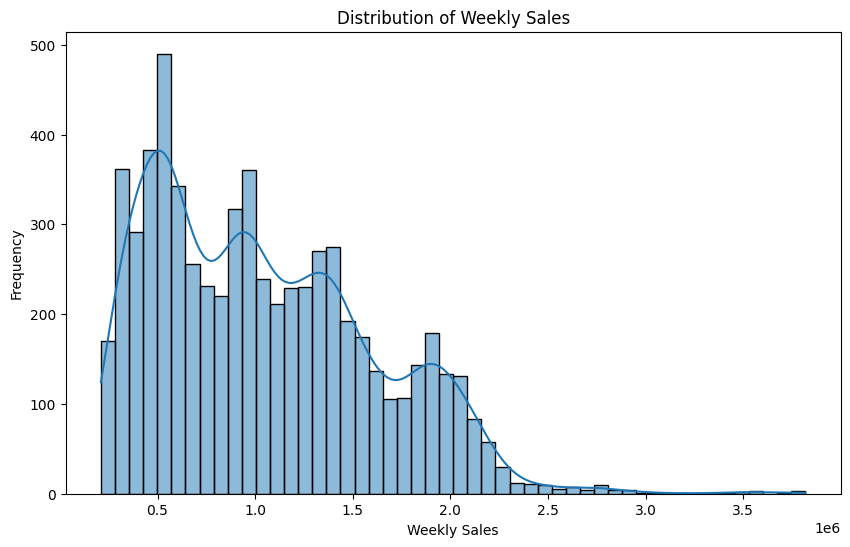

Skewness of Weekly Sales: 0.6683617974864524
No transformation needed for Weekly Sales.


In [21]:
# Plotting the distribution of the target variable 'Weekly_Sales'
plt.figure(figsize=(10, 6))
sns.histplot(data['Weekly_Sales'], bins=50, kde=True)  # Histogram + KDE
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Checking the skewness of the 'Weekly_Sales' column
skewness = data['Weekly_Sales'].skew()
print(f"Skewness of Weekly Sales: {skewness}")

# Applying log transformation if the data is positively skewed
if skewness > 1:
    data['Weekly_Sales_log'] = data['Weekly_Sales'].apply(lambda x: np.log(x + 1))  # Log transform
    sns.histplot(data['Weekly_Sales_log'], bins=50, kde=True)
    plt.title('Log Transformed Distribution of Weekly Sales')
    plt.xlabel('Log(Weekly Sales)')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("No transformation needed for Weekly Sales.")

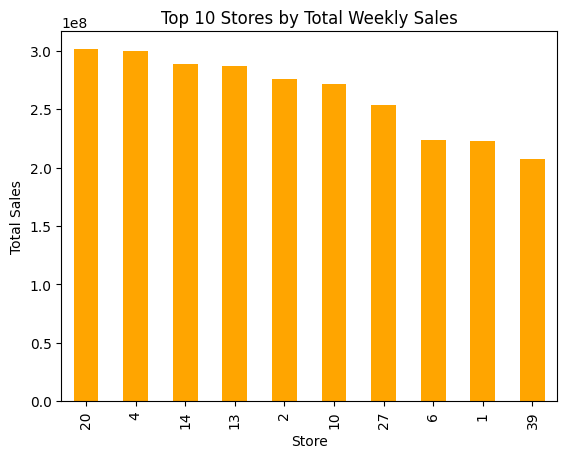

In [22]:
#Analyzing Store Performance
# Total sales per store
store_sales = data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)

# Plot top 10 performing stores
store_sales.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Stores by Total Weekly Sales')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.show()

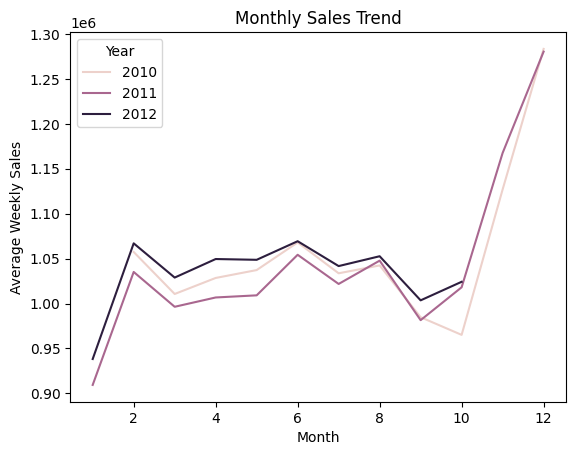

In [10]:
#Seasonal Analysis
# Convert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Extract year and month
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# Monthly sales trend
monthly_sales = data.groupby(['Year', 'Month'])['Weekly_Sales'].mean().reset_index()

# Plot monthly trend
sns.lineplot(x='Month', y='Weekly_Sales', hue='Year', data=monthly_sales)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.show()

> This plot reveals patterns in sales by month and helps to identify if certain months or seasons are more profitable.



# **5. Feature Engineering**

In [12]:
# Extract more date-related features
data['Day'] = data['Date'].dt.day
data['Holiday_Flag'] = data['Holiday_Flag'].astype(int)  # Convert boolean to integer
data['WeekOfYear'] = data['Date'].dt.isocalendar().week

# Drop redundant columns
data.drop(['Date'], axis=1, inplace=True)

# **6. Preparing the Data for Modeling**

In [15]:
# Define target and features
X = data.drop(columns=['Weekly_Sales'])
y = data['Weekly_Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (5148, 10)
Testing data shape: (1287, 10)


# **7. Building and Training a Model**

In [16]:
# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# **8. Evaluating the Model**

Mean Squared Error: 11413895239.2707
Mean Absolute Error: 54054.2415


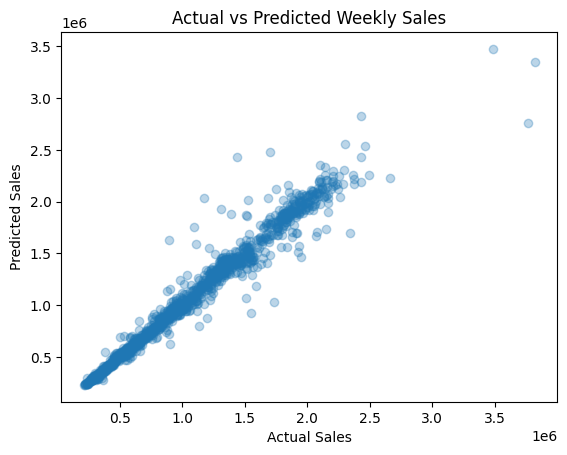

In [19]:
# Calculate errors
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

# Plot actual vs predicted
plt.scatter(y_test, y_pred, alpha=0.3)
plt.title('Actual vs Predicted Weekly Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

In this plot:
* x-axis: Actual sales (true values)
* y-axis: Predicted sales (from the model)
> The closer the points are to a 45-degree diagonal line, the better the model is predicting.



# **9. Saving Results**

In [18]:
import joblib

# Save the trained model
joblib.dump(model, 'walmart_sales_model.pkl')

# Save predictions
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions.to_csv('predictions.csv', index=False)
